In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [23]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
dataset_dki_q4

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000
...,...,...,...,...,...,...,...,...,...,...,...
4976,1736803,2019-12-22,14577,Jakarta Selatan,DKI Jakarta,P0753,BRAND_C,2,1500000,2019-12,3000000
4992,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,2019-12,620000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000,2019-10,2988000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000,2019-10,5560000


In [4]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()

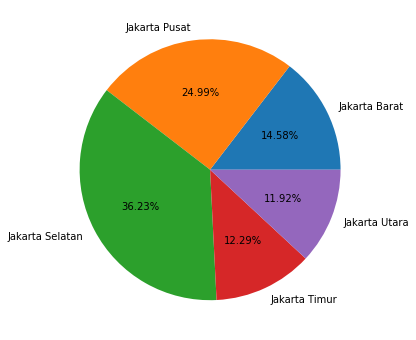

In [5]:
#Pie Chart
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'],labels=gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.show()

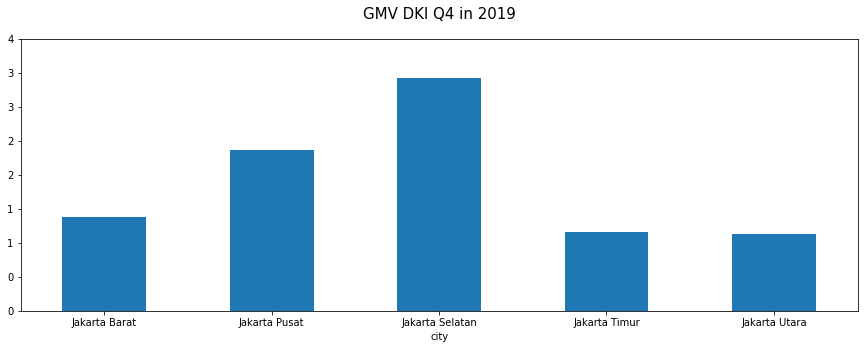

In [6]:
#Bar Chart Vertikal
plt.figure(figsize=(15,5))
dataset_dki_q4.groupby('city')['gmv'].sum().plot(kind='bar')
plt.title('GMV DKI Q4 in 2019',color='black',pad=20,fontsize=15)
plt.xticks(rotation=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.show()

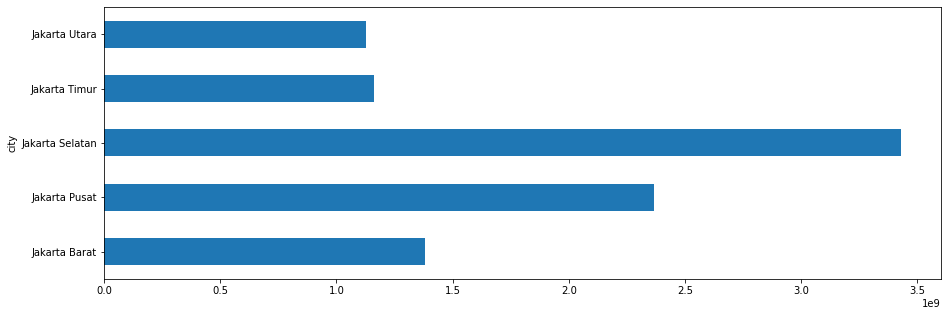

In [7]:
#Bar chart horizontal
plt.figure(figsize=(15,5))
dataset_dki_q4.groupby('city')['gmv'].sum().plot(kind='barh')
plt.show()

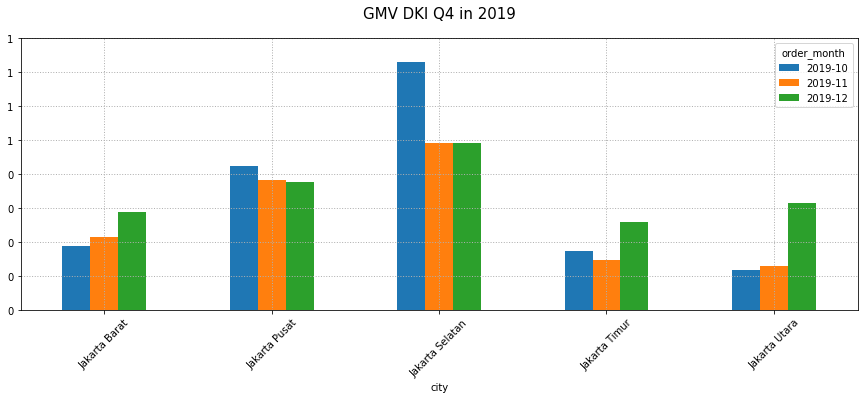

In [8]:
#Multi-Bar Chart
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV DKI Q4 in 2019',color='black',pad=20,fontsize=15)
plt.grid(linestyle=':',linewidth=1)
plt.xticks(rotation=45)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.gcf().set_size_inches(15,5)
plt.show()

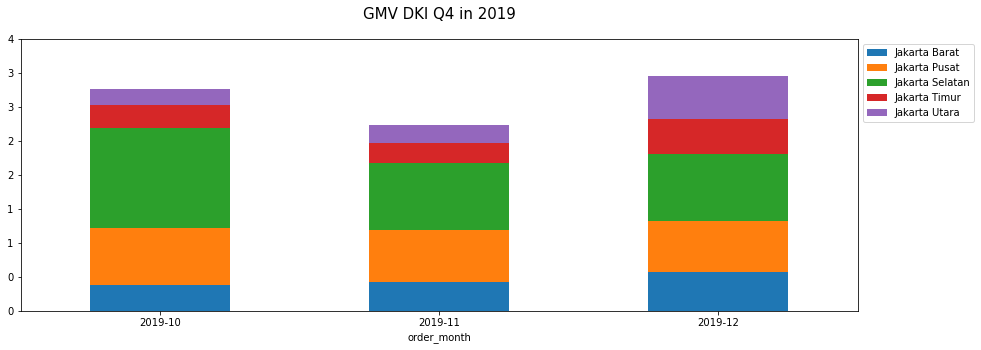

In [9]:
#Stacked Bar Chart
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().unstack().plot(kind='bar',stacked=True)
plt.title('GMV DKI Q4 in 2019',color='black',pad=20,fontsize=15)
plt.xticks(rotation=0)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.gcf().set_size_inches(15,5)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [26]:
data_per_customer = dataset_dki_q4.groupby('customer_id').agg({'order_id':'nunique',
                                                              'quantity':'sum',
                                                              'gmv':'sum'}).reset_index().rename(columns={'order_id':'orders'}).sort_values(by='quantity',ascending=False)
                                                         
data_per_customer

,customer_id,orders,quantity,gmv
479,16684,4,1120,784768000
0,12748,29,557,175286000
116,13911,1,384,23424000
94,13685,2,361,124349000
118,13918,1,288,24768000
...,...,...,...,...
132,14034,1,1,1325000
437,16374,1,1,450000
367,15790,1,1,3494000
357,15708,1,1,1745000


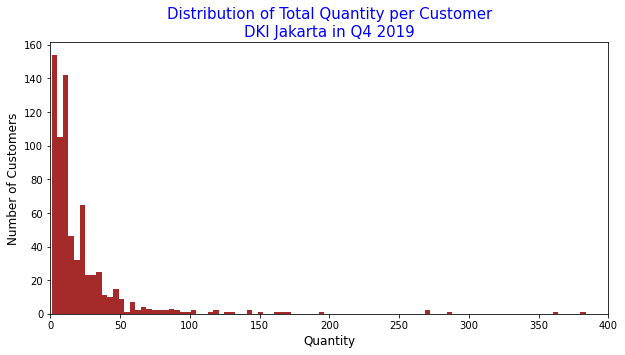

In [44]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'],bins=100,range=(1,400),color='brown',orientation='vertical')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.xlim(xmin=0,xmax=400)
plt.show()

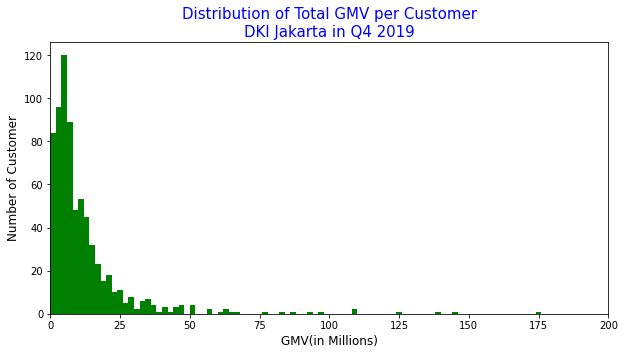

In [32]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'],bins=100,range=(1,200000000),color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('GMV(in Millions)',fontsize=12)
plt.ylabel('Number of Customer',fontsize=12)
plt.xlim(xmin=0,xmax=200000000)
labels,locations = plt.xticks()
plt.xticks(labels,(labels/1000000).astype(int))
plt.show()

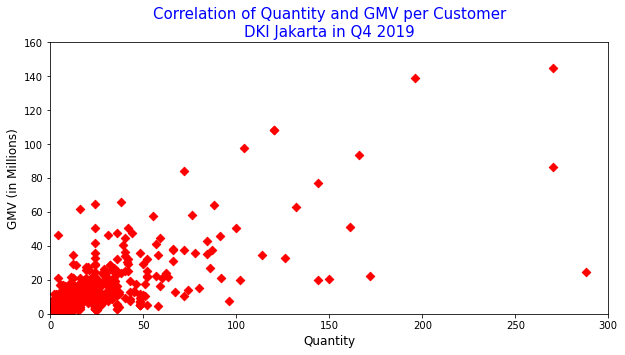

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'],marker='D',color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('Quantity',fontsize=12)
plt.ylabel('GMV (in Millions)',fontsize=12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels,locations = plt.yticks()
plt.yticks(labels,(labels/1000000).astype(int))
plt.show()